In [160]:
"""
TO-DO:
[x] - Intersection of all methods
    [x] - t-Sne + TF-IDF + YAKE! + CrowdTruth
[x] - Intersection of 3 methods
    [x] - t-Sne + TF-IDF + YAKE!
    [x] - t-Sne + TF-IDF + CrowdTruth
    [x] - t-Sne + YAKE! + CrowdTruth
    [x] - TF-IDF + YAKE! + CrowdTruth
[X] - Intersection of 2 methods
    [x] - t-Sne + TF-IDF
    [x] - t-Sne + YAKE!
    [x] - t-Sne + CrowdTruth
    
    [x] - TF-IDF + YAKE!
    [x] - TF-IDF + CrowdTruth
    
    [x] - YAKE! + CrowdTruth
    
[x] - tags unique to only one method.
    [x] - t-Sne
    [x] - TF-IDF
    [x] - YAKE!
    [x] - CrowdTruth
    
[x] - create Venn Diagram for all methods
"""

'\nTO-DO:\n[x] - Intersection of all methods\n    [x] - t-Sne + TF-IDF + YAKE! + CrowdTruth\n[x] - Intersection of 3 methods\n    [x] - t-Sne + TF-IDF + YAKE!\n    [x] - t-Sne + TF-IDF + CrowdTruth\n    [x] - t-Sne + YAKE! + CrowdTruth\n    [x] - TF-IDF + YAKE! + CrowdTruth\n[X] - Intersection of 2 methods\n    [x] - t-Sne + TF-IDF\n    [x] - t-Sne + YAKE!\n    [x] - t-Sne + CrowdTruth\n    \n    [x] - TF-IDF + YAKE!\n    [x] - TF-IDF + CrowdTruth\n    \n    [x] - YAKE! + CrowdTruth\n    \n[x] - tags unique to only one method.\n    [x] - t-Sne\n    [x] - TF-IDF\n    [x] - YAKE!\n    [x] - CrowdTruth\n    \n[x] - create Venn Diagram for all methods\n'

In [161]:
import csv

#!pip install venn
from venn import venn
%matplotlib inline

In [162]:
def get_set_from_csv(file_path):
    tag_set = set()
    with open(file_path, encoding="utf8") as csv_file:
        csv_reader = csv.reader(csv_file)
        for tag in csv_reader:
            tag_set.add(tag[0])
        
    #print(tag_set)    
    return tag_set

In [163]:
def write_csv(tags, outfile_path):    
    with open(outfile_path, 'w', encoding="utf8") as file:
        for tag in tags:
            file.write(tag)
            file.write('\n')
        #csv_writer = csv.writer(csv_file)
        #csv_writer.writerow(tags)

In [164]:
crowdtruth = get_set_from_csv('crowdtruth.csv')
tfidf = get_set_from_csv('TF-IDF.csv')
yake = get_set_from_csv('YAKE.csv')
tsne = get_set_from_csv('t-sne.csv')      

print('Number of candidate tags from CrowdTruth: ' + str(len(crowdtruth)))
print('Number of candidate tags from TF-IDF: ' + str(len(tfidf)))
print('Number of candidate tags from YAKE!: ' + str(len(yake)))
print('Number of candidate tags from t-SNE: ' + str(len(tsne)))

Number of candidate tags from CrowdTruth: 493
Number of candidate tags from TF-IDF: 1487
Number of candidate tags from YAKE!: 4448
Number of candidate tags from t-SNE: 459


# Venn Diagram

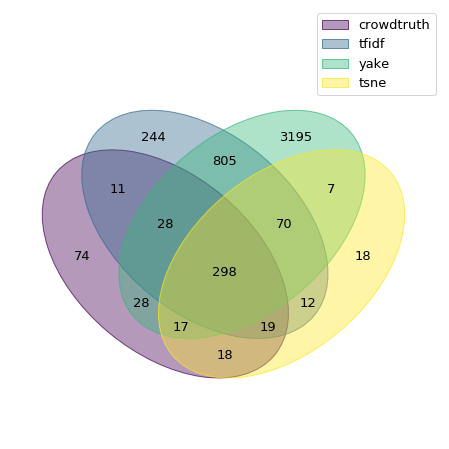

In [165]:
methods = {}
methods['crowdtruth'] = crowdtruth
methods['tfidf'] = tfidf
methods['yake'] = yake
methods['tsne'] = tsne

venn(methods)


# Intersection of all methods

In [166]:
intersection_all = crowdtruth.intersection(tfidf, yake, tsne)
print('Number of tags: ' + str(len(intersection_all)))
#print(intersection_all)

write_csv(intersection_all, 'all_methods_intersection')

Number of tags: 298


# Intersection of 3 methods

## t-Sne + TF-IDF + YAKE!

In [167]:
intersection = tsne.intersection(tfidf, yake)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 368


## t-Sne + TF-IDF + CrowdTruth

In [168]:
intersection = tsne.intersection(tfidf, crowdtruth)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 317


## t-Sne + YAKE! + CrowdTruth

In [169]:
intersection = crowdtruth.intersection(yake, tsne)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 315


## TF-IDF + YAKE! + CrowdTruth

In [170]:
intersection = crowdtruth.intersection(tfidf, yake)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 326


# Intersection of 2 methods

## t-Sne

In [171]:
method_names = ['CrowdTruth', 'TF-IDF', 'YAKE!']
methods = [crowdtruth, tfidf, yake]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for t-Sne and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for t-Sne and CrowdTruth: 352


Number of tags for t-Sne and TF-IDF: 399


Number of tags for t-Sne and YAKE!: 392




## TF-IDF

In [172]:
method_names = ['CrowdTruth', 'YAKE!', 't-SNE']
methods = [crowdtruth, yake, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for TF-IDF and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for TF-IDF and CrowdTruth: 352


Number of tags for TF-IDF and YAKE!: 392


Number of tags for TF-IDF and t-SNE: 459




## YAKE!

In [173]:
method_names = ['CrowdTruth', 'TF-IDF', 't-SNE']
methods = [crowdtruth, tfidf, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for YAKE! and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for YAKE! and CrowdTruth: 352


Number of tags for YAKE! and TF-IDF: 399


Number of tags for YAKE! and t-SNE: 459




## CrowdTruth

In [174]:
method_names = ['TF-IDF', 'YAKE!', 't-SNE']
methods = [tfidf, yake, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for CrowdTruth and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for CrowdTruth and TF-IDF: 399


Number of tags for CrowdTruth and YAKE!: 392


Number of tags for CrowdTruth and t-SNE: 459




# Tags unique to only one method

### t-SNE

In [175]:
other_tags = crowdtruth.intersection(tfidf, yake)
tags = tsne - other_tags
print('Number of unique tags for t-SNE: ' + str(len(tags)))
#print(tags)

Number of unique tags for t-SNE: 161


### TF-IDF

In [176]:
other_tags = crowdtruth.intersection(yake, tsne)
tags = tfidf - other_tags
print('Number of unique tags for TF-IDF: ' + str(len(tags)))
#print(tags)

Number of unique tags for TF-IDF: 1189


### YAKE!

In [177]:
other_tags = tsne.intersection(tfidf, crowdtruth)
tags = yake - other_tags
print('Number of unique tags for YAKE!: ' + str(len(tags)))
#print(tags)

Number of unique tags for YAKE!: 4150


### CrowdTruth

In [178]:
other_tags = tsne.intersection(tfidf, yake)
tags = crowdtruth - other_tags
print('Number of unique tags for CrowdTruth: ' + str(len(tags)))
#print(tags)

Number of unique tags for CrowdTruth: 195
